# **Predictive Modeling for Real Estate Prices** - Guatemala's municipalities

## **Content**

- [Introduction](#Introduction)
- [Objectives](#Objectives)
- [Context](#Context)
- [Models to use](#Models-to-Use)
- [Import Libraries and Load Clean Data](#Import-Libraries-and-Load-Clean-Data)
- [Preprocessing, training and test, and graphic function](#Define-Function)
- [Linear Regression](#Linear-Regression)
    - [House](#House:-Linear-Regression-Results)
    - [Apartment](#Apartment:-Linear-Regression-Results)
- [Lasso Regression](#Lasso-Regression)
    - [House](#House:-Lasso-Regression-Results)
    - [Apartment](#Apartment:-Lasso-Regression-Results)
- [Decision Tree](#Decision-Tree)
    - [House](#House:-Decision-Tree-Results)
    - [Apartment](#Apartment:-Decision-Tree-Results)
- [Random Forest](#Random-Forest)
    - [House](#House:-Random-Forest-Results)
    - [Apartment](#Apartment:-Random-Forest-Results)
- [Gradient Boosting](#Gradient-Boosting)
    - [House](#House:-Gradient-Boosting-Results)
    - [Apartment](#Apartment:-Gradient-Boosting-Results)
- [Model Summary](#Model-Performance-Summary)
- [Conclusions](#Conclusions)
- [Recommendations](#Recommendations)
- [Future Directions](#Future-Directions)

## **Introduction**

In this project, data analysis and predictive techniques are employed to predict residential property prices in the municipalities of Guatemala. Using data collected through web scraping from property listings, the analysis aims to understand market dynamics and provide accurate predictions for houses and apartments within a specified price range (Q 400,000 to Q 2,000,000).

Evaluated models include Linear Regression, Lasso Regression, Decision Tree, Random Forest, and Gradient Boosting, each analyzed based on the property type (house or apartment). This project demonstrates skills in data cleaning, analysis, and the effective use of Power BI for visualizations.
## **Objectives**

1. **Develop Predictive Models:** Create accurate models to estimate real estate prices for houses and apartments based on property features.

2. **Model Evaluation:** Compare performance among different regression models to identify the most effective approach.

3. **Data-Driven Insights:** Utilize model results to provide actionable insights for market participants in the Guatemalan real estate sector.

## **Context**

This project phase focuses on building advanced predictive models for real estate prices using data from various municipalities in Guatemala. Given the property diversity  market and previous analyses, we will develop separate models for houses and apartments. Each model will consider key features identified during exploratory analysis, such as square meters, rooms, parking, and baths, to enhance prediction accuracy.

The outcomes from this modeling phase will support strategic decision-making for investors and real estate professionals by providing reliable price forecasts.

[Back to Top](#Content)

## **Models to Use**

1. **Linear Regression:** A fundamental regression model that assumes a linear relationship between independent variables and prices, providing easy interpretation of coefficients.

2. **Lasso Regression:** Similar to linear regression but includes a penalization term to manage multicollinearity by shrinking coefficients of less important variables. Useful for enhancing prediction accuracy.

3. **Decision Tree:** A model that splits data into branches, making decisions based on chosen features. Useful for capturing non-linear relationships.

4. **Random Forest:** An ensemble method combining multiple decision trees to improve accuracy and reduce overfitting.

5. **Gradient Boosting:** An advanced ensemble technique that builds predictive models from weaker models in an iterative fashion to boost accuracy.

[Back to Top](#Content)


## **Import Libraries and Load Clean Data**

In this section, we import the necessary libraries for data manipulation, model training, and evaluation. We also load the cleaned dataset, prepared for predictive modeling.

In [1]:
# 1) Importing libraries.
import pandas as pd  # For data manipulation and analysis.
import numpy as np  # For numerical operations and handling arrays.
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations.
import seaborn as sns # For making statistical graphics with enhanced visual appeal.
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets.
from sklearn.linear_model import LinearRegression, Lasso  # Import linear and Lasso regression models.
from sklearn.tree import DecisionTreeRegressor  # Import decision tree model.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Import ensemble models.
from sklearn.metrics import mean_squared_error, r2_score  # To evaluate model performance.

[Back to Top](#Content)

In [2]:
# 2) Load clean Data Frame.

# Specifies directory path where CSV file is located.
directory = 'C:/Users/DAV/Documents/Python/Python_Project/House_price_project/data/clean/'

# Define file name.
filename = 'clean-data.csv'  

# Build full file path.
file_path = directory + filename

# Upload the CSV file using constructed path.
df = pd.read_csv(file_path)

In [3]:
# 3) Dictionary for quick access to models, with random_state where applicable.
model_dict = {
    'linear_regression': LinearRegression(),
    'lasso_regression': Lasso(random_state=42),
    'decision_tree': DecisionTreeRegressor(random_state=42),
    'random_forest': RandomForestRegressor(random_state=42),
    'gradient_boosting': GradientBoostingRegressor(random_state=42)
}

[Back to Top](#Content)

## **Define Function**

In [4]:
# 4) Define preprocessing function.
def preprocess_data(df, prop_type):
    """Preprocess data by filtering by property type and encoding."""
    # Filter dataset for the specified property type, such as 'house' or 'apartment'.
    df_filtered = df[df['type'] == prop_type]
    # Raise an error if no data exists for the specified property type.
    if df_filtered.empty:
        raise ValueError("There is no data for the specified property type.")
    # Select relevant features and target variable for prediction.
    X = df_filtered[['square_meters', 'rooms', 'parking', 'baths', 'municipality', 'zone']]
    y = df_filtered['price_quetzales']
    # Encode categorical features using one-hot encoding.
    X_encoded = pd.get_dummies(X, columns=['municipality', 'zone'], drop_first=True)
    # Split data into training and testing sets.
    return train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 5) Define graphic function.
def plot_results(y_test, y_pred, model_name, prop_type):
    """Generate and display plots for residuals, actual vs predicted, and error distribution."""
    # Create a figure with three subplots for visualization.
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Performance Visualization for {model_name} ({prop_type})', fontsize=22, fontweight='bold')
    
    # Plot residuals to show the difference between actual and predicted values.
    residuals = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[0], alpha=0.5)
    axes[0].axhline(y=0, color='r', linestyle='--')
    axes[0].set_title('Residuals Plot', fontweight='bold')
    axes[0].set_xlabel('Predicted Values', fontweight='bold')
    axes[0].set_ylabel('Residuals', fontweight='bold')
    
    # Plot actual vs predicted values to evaluate prediction accuracy.
    axes[1].scatter(y_test, y_pred, alpha=0.5)
    axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axes[1].set_title('Actual vs Predicted Prices', fontweight='bold')
    axes[1].set_xlabel('Actual Prices', fontweight='bold')
    axes[1].set_ylabel('Predicted Prices', fontweight='bold')
    
    # Plot error distribution to analyze the spread of prediction errors.
    sns.histplot(residuals, bins=30, kde=True, ax=axes[2])
    axes[2].set_title('Error Distribution', fontweight='bold')
    axes[2].set_xlabel('Prediction Error', fontweight='bold')
    axes[2].set_ylabel('Frequency', fontweight='bold')
    
    for ax in axes:
        ax.set_facecolor('lightgray')
    fig.patch.set_facecolor('slategrey')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# 6) Define training and evaluation function.
def train_predictive_model(model_name, prop_type, df):
    # Preprocess the data to obtain training and testing datasets.
    X_train, X_test, y_train, y_test = preprocess_data(df, prop_type)
    
    # Retrieve the specified model from a dictionary of models.
    model = model_dict.get(model_name)
    if model is None:
        raise ValueError("Model not supported. Choose one of the following: " + ", ".join(model_dict.keys()))
    # Train the model and make predictions on the test data.
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate and print model performance metrics: MSE and R² score.
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {model_name}, Property Type: {prop_type}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    # Generate performance plots to visualize model accuracy and error distribution.
    plot_results(y_test, y_pred, model_name, prop_type)

[Back to Top](#Content)

## **Linear Regression**

Model: linear_regression, Property Type: house
Mean Squared Error: 114490611392.54027
R^2 Score: 0.30881913339216505


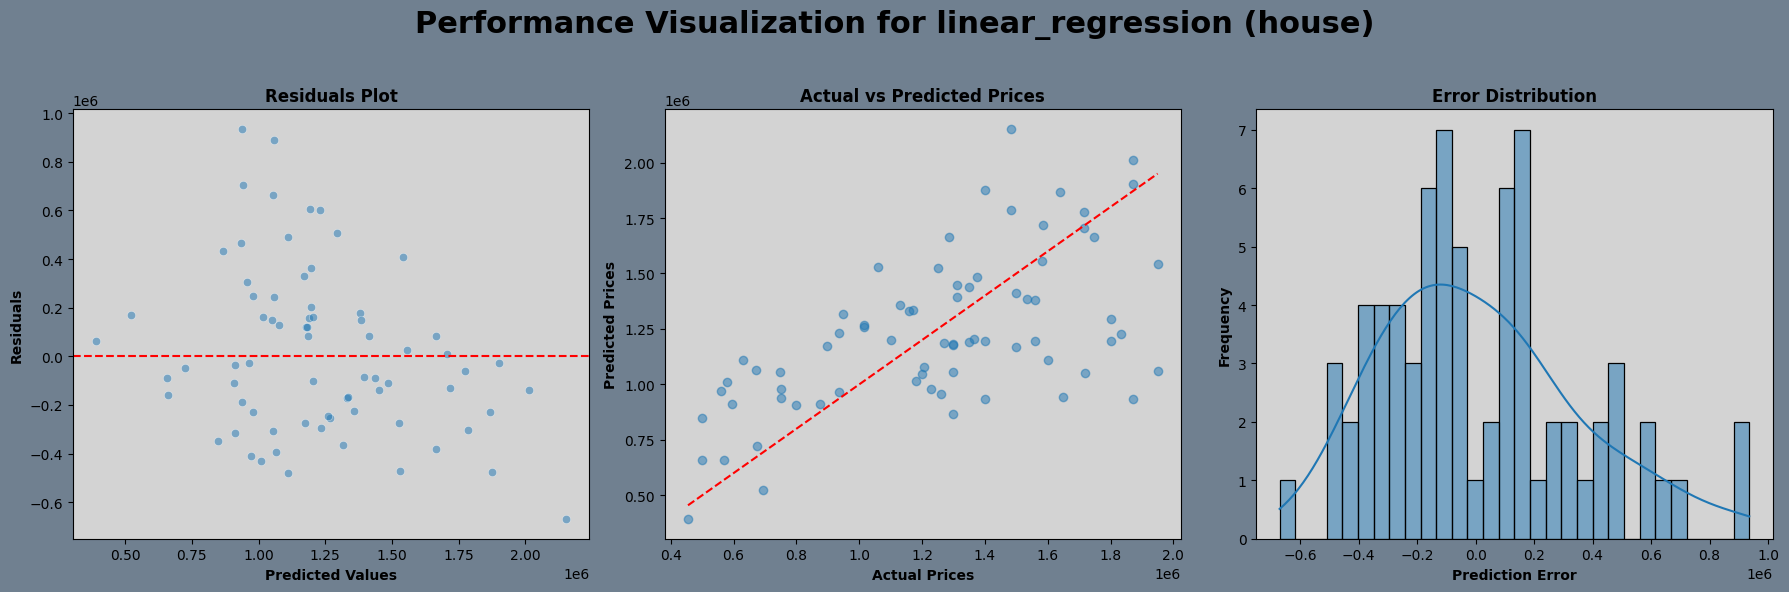

In [5]:
# House Linear Regression.
train_predictive_model('linear_regression', 'house', df)

### **House: Linear Regression Results**

##### The linear regression model for predicting house prices yielded the following results:

- **Mean Squared Error (MSE):** 114,490,611,392.54
- **R² Score:** 0.31

##### These results indicate that the model captures about 30.88% of the variance in house prices, suggesting moderate explanatory power. The relatively high MSE implies that the model's predictions deviate significantly from actual prices, indicating room for improvement.

### **Graphics results**
- ##### **Residuals Plot (House - Linear Regression):** The residuals are randomly dispersed around zero, indicating the model captures linear relationships. However, the wide spread across predicted values suggests variability not fully addressed by the model.
- ##### **Actual vs Predicted Prices (House - Linear Regression):** Points mostly align with the diagonal, signaling a positive correlation. However, the spread, particularly at higher prices, indicates challenges in precisely predicting expensive houses, pointing to limitations in capturing pricing complexity.
- ##### **Error Distribution (House - Linear Regression):** The error distribution shows a spread around zero with a slightly higher concentration of errors within the range of ±200,000. This suggests that the Linear Regression model is generally accurate, but there are notable prediction errors. The spread of errors indicates variability, but the symmetry around zero implies that the model doesn't consistently overestimate or underestimate the house prices.
[Back to Top](#Content)

Model: linear_regression, Property Type: apartment
Mean Squared Error: 37609714436.33177
R^2 Score: 0.6764217784892531


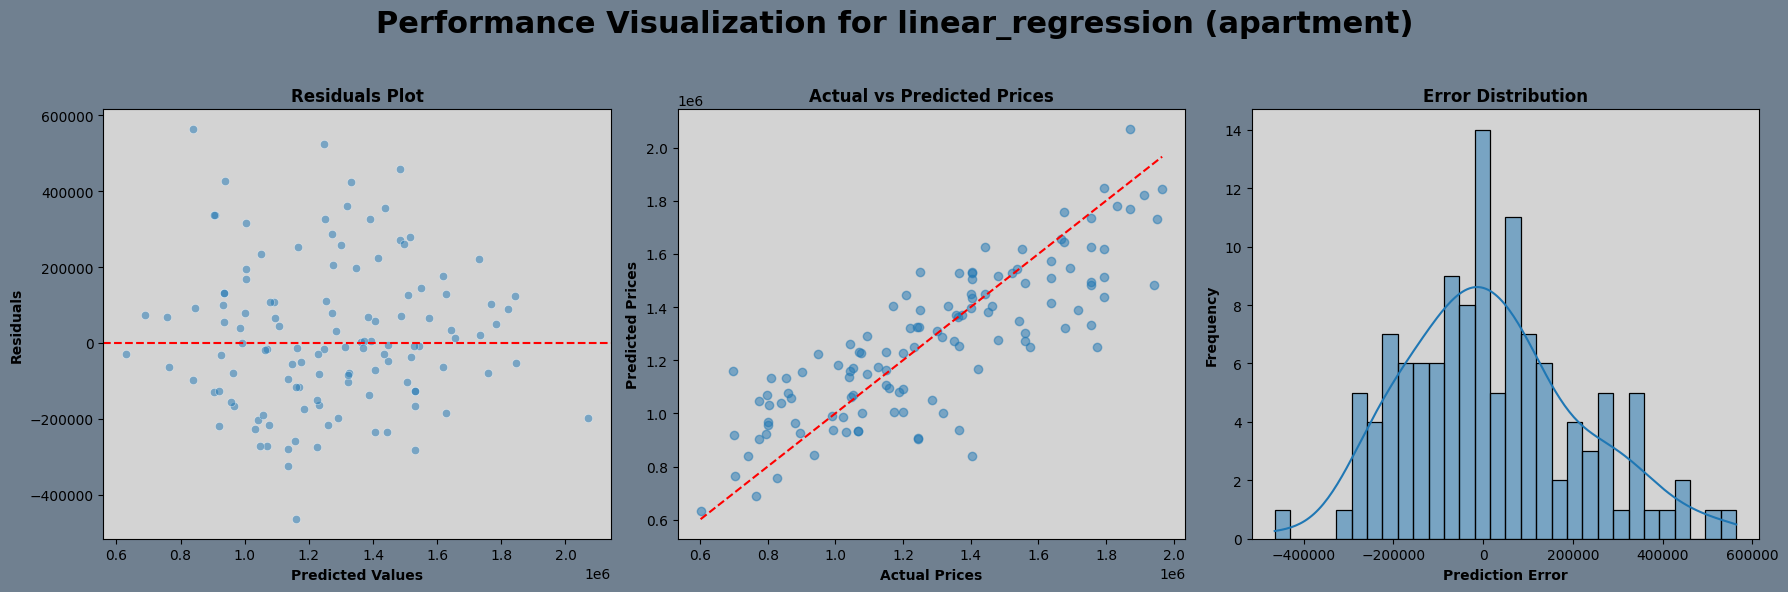

In [6]:
# Apartment Linear Regression
train_predictive_model('linear_regression', 'apartment', df)

### **Apartment: Linear Regression Results**

##### For apartments, the linear regression model produced these results:

- **Mean Squared Error (MSE):** 37,609,714,436.33
- **R² Score:** 0.68

##### The model explains approximately 67.64% of the variance in apartment prices, demonstrating a better performance compared to the house model. The lower MSE suggests that predictions for apartment prices are more accurate, possibly due to consistent patterns in apartment feature impacts.

### **Graphic Results**
##### - **Residuals Plot (Apartment - Linear Regression):** Residuals are randomly scattered around zero, indicating trend capture without obvious bias. However, the significant spread suggests difficulties in accurately predicting prices, especially for lower and higher-priced apartments, reflecting unmet complexities.
##### - **Actual vs Predicted Prices (Apartment - Linear Regression):** Points align closely with the diagonal, showing a strong correlation. The spread, especially at higher prices, indicates difficulties in accurately predicting expensive apartments, suggesting unmet complexities in price extremes.
##### - **Error Distribution (Apartment - Linear Regression):** Errors are roughly normally distributed around zero, indicating unbiased predictions. However, outliers and error spread highlight challenges in accurately predicting certain apartments, particularly those with extreme price errors, suggesting inconsistencies across the full price range.

[Back to Top](#Content)

## **Lasso Regression**

Model: lasso_regression, Property Type: house
Mean Squared Error: 114502773890.85555
R^2 Score: 0.3087457082787568


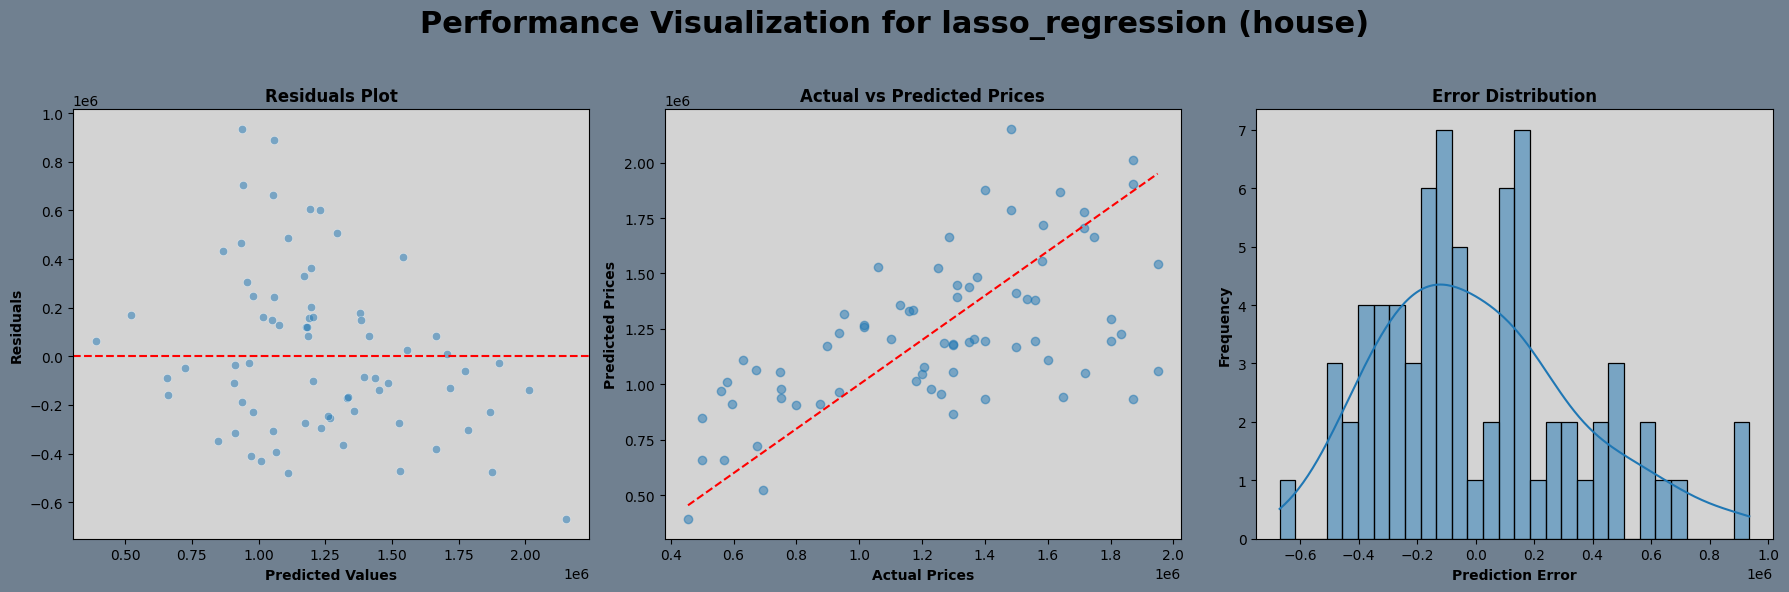

In [7]:
# House Lasso Regression
train_predictive_model('lasso_regression', 'house', df)

### **House: Lasso Regression Results**
##### The lasso regression model for predicting house prices yielded the following results:
- **Mean Squared Error (MSE):** 114,502,773,890.86
- **R² score:** 0.31 

##### This indicates that the model struggles to explain much of the variance in house prices, suggesting it may not be well-suited for capturing the underlying complexity in the data for this property type.
### **Graphic Results**
##### - **Residuals Plot (House - Lasso Regression):** Residuals are spread around zero, indicating capture of linear relationships. However, a funnel shape with more variance at low and high predicted values suggests underfitting due to over-penalization, causing inaccuracy at extreme price points.
##### - **Actual vs Predicted Prices (House - Lasso Regression):** Points show positive correlation by aligning with the diagonal. However, greater spread, particularly at higher prices, indicates struggles in accuracy for expensive houses, suggesting oversimplification due to regularization.
##### - **Error Distribution (House - Lasso Regression):** Errors are approximately normal and centered around zero, indicating unbiased predictions. However, a right skew suggests occasional underestimation of prices, with varying magnitude of errors, indicating inconsistencies in capturing price variability.

[Back to Top](#Content)

C:\Users\DAV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.896e+12, tolerance: 7.002e+09
  model = cd_fast.enet_coordinate_descent(


Model: lasso_regression, Property Type: apartment
Mean Squared Error: 37611495907.2127
R^2 Score: 0.6764064514603734


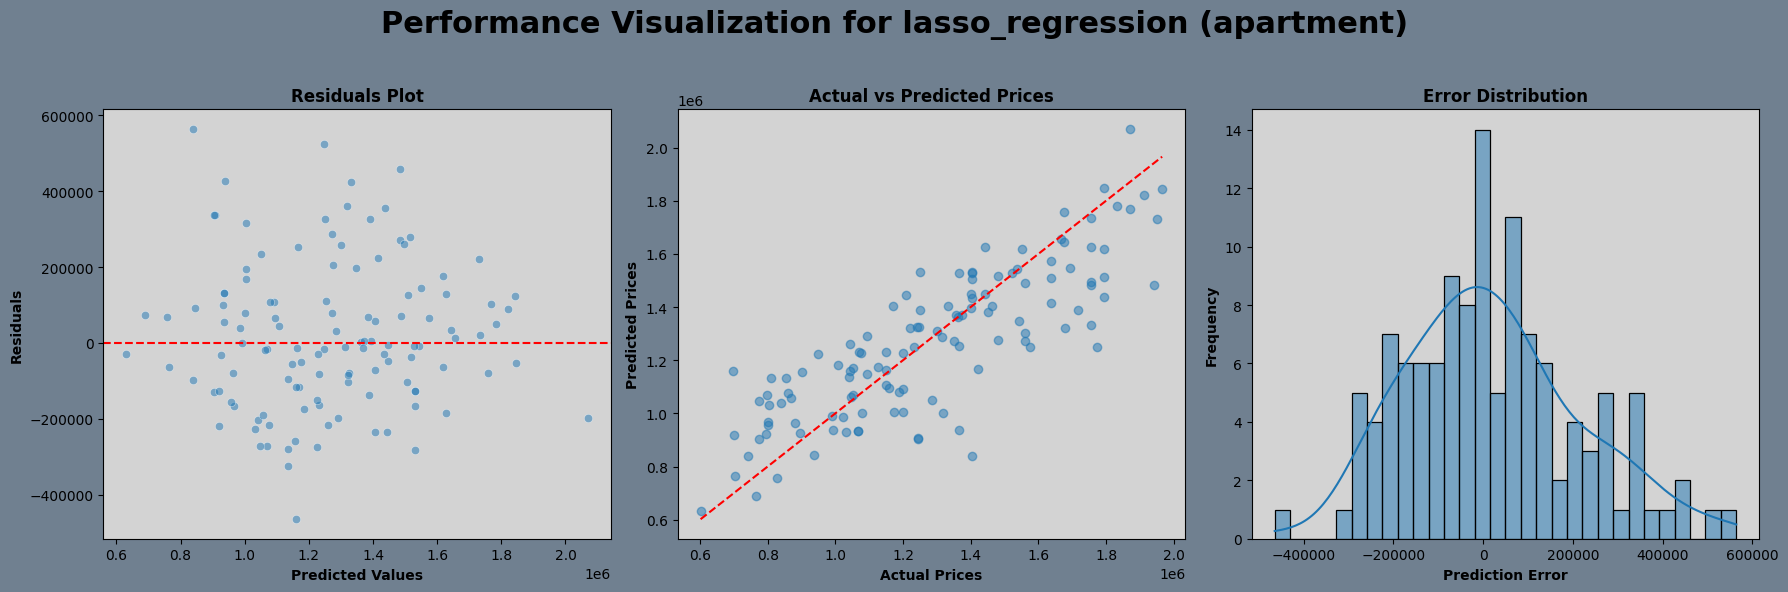

In [8]:
# Apartment Lasso Regression
train_predictive_model('lasso_regression', 'apartment', df)

### **Apartment: Lasso Regression Results**
##### For apartments, the lasso regression model produced these results:
- **Mean Squared Error (MSE):** 37,611,495,907.21 
- **R² score:** 0.68. 

##### This indicates a moderate level of accuracy, with the model explaining a significant portion of the variance in apartment prices. However, there is still room for improvement, particularly in predicting higher or lower-end prices.
### **Graphic Results**
##### - **Residuals Plot (Apartment - Lasso Regression):** Residuals are dispersed around zero, indicating incomplete capture of feature-price relationships. Variance in errors across predicted levels suggests challenges with certain price ranges, though no distinct pattern indicates a lack of strong bias.
##### - **Actual vs Predicted Prices (Apartment - Lasso Regression):** Points align well with the diagonal, showing reasonable prediction accuracy. Some scatter at high and low prices indicates challenges in capturing extremes, suggesting reduced accuracy at these ranges.
##### - **Error Distribution (Apartment - Lasso Regression):** Errors are roughly normal and centered around zero, indicating unbiased predictions. While most errors are small, the spread, especially at extremes, suggests occasional struggles with accurate pricing predictions.
[Back to Top](#Content)

## **Decision Tree**

Model: decision_tree, Property Type: house
Mean Squared Error: 113909336988.04167
R^2 Score: 0.3123282922808429


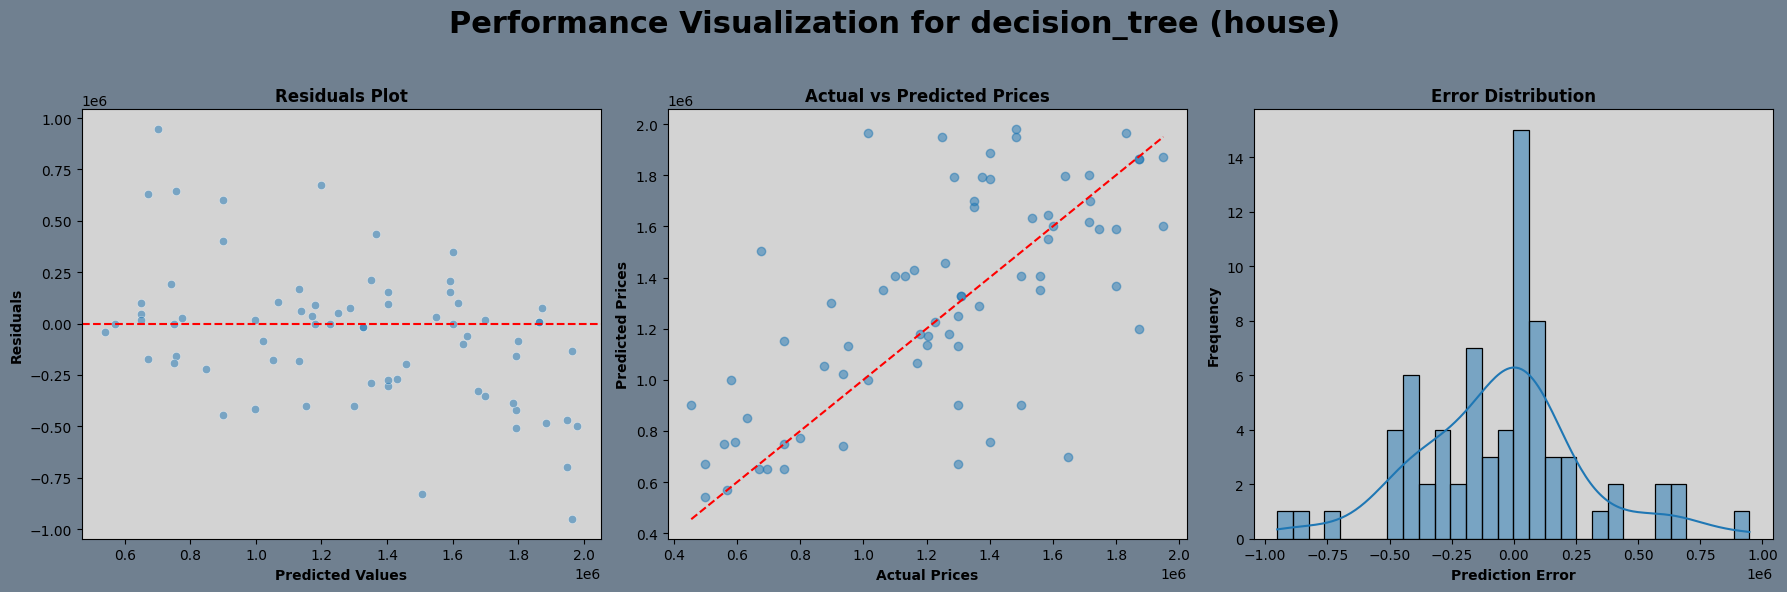

In [9]:
# House Decision Trre
train_predictive_model('decision_tree', 'house', df)

### **House: Decision Tree Results**
##### The decision tree model for predicting house prices yielded the following results:
- **Mean Squared Error (MSE):** 113,909,336,988.04
- **R² Score:** 0.31

##### The decision tree model captures some of the variability in house prices, as indicated by the R² score of 0.31. However, the relatively high MSE suggests that the model is not very accurate, with significant errors in the predictions. This implies that the model might be overfitting or struggling to generalize well across different house price ranges.
### **Graphic Results**
##### -**Residuals Plot (House - Decision Tree):** Residuals scatter around zero, with patterns, especially larger errors at high values, indicating potential underfitting or overfitting. These patterns suggest unreliable predictions across all house price levels.
##### **Actual vs Predicted Prices (House - Decision Tree):** Points mostly align with the diagonal, capturing the overall price trend. However, significant spread, especially at high prices, suggests challenges in accuracy for expensive houses, indicating limited precision at extremes.
##### -**Error Distribution (House - Decision Tree):** Errors center around zero, indicating no consistent bias. However, the spread and skewness, along with outliers, suggest significant errors in both directions, highlighting performance inconsistencies across price ranges.

[Back to Top](#Content)

Model: decision_tree, Property Type: apartment
Mean Squared Error: 54712149941.41416
R^2 Score: 0.5292795907014386


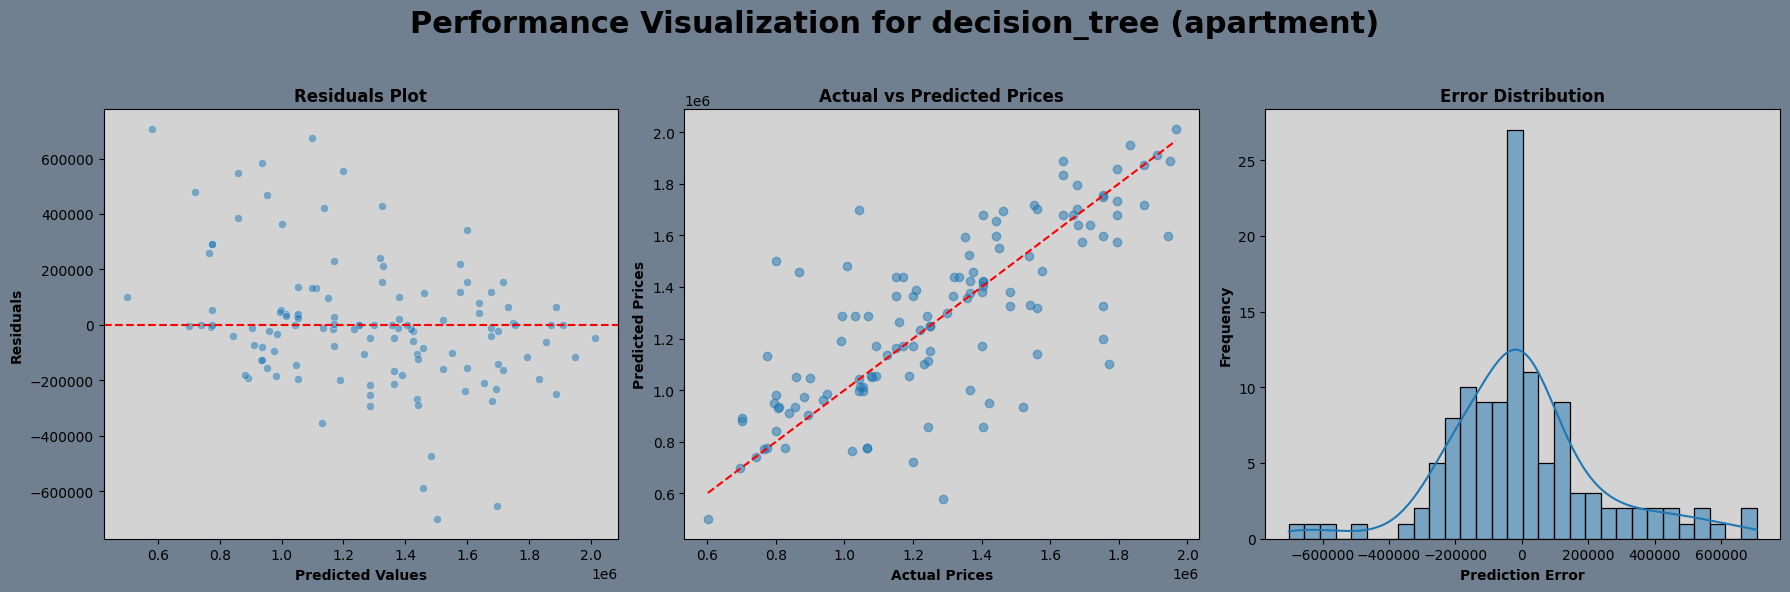

In [10]:
# Apartment Decision Tree
train_predictive_model('decision_tree', 'apartment', df)

### **Apartment: Decision Tree Results**
##### The decision tree model for predicting apartment prices yielded the following results:

- **Mean Squared Error (MSE):** 54,712,149,941.41
- **R² Score:** 0.53

##### For apartments, the decision tree model performs better with an R² score of 0.53, indicating a moderate fit. The lower MSE compared to the house data suggests that the model is more accurate in predicting apartment prices. However, the R² score still shows that the model is not fully capturing all the variability, indicating room for improvement.
### **Graphic Results**
##### - **Residuals Plot (Apartment - Decision Tree)** Residuals are evenly scattered around zero, but increase with higher predicted values, suggesting struggles with high-priced apartments. This spread indicates potential inaccuracies at both ends of the price spectrum due to unmet complexities.
##### - **Actual vs Predicted Prices (Apartment - Decision Tree):** Points generally follow the diagonal, indicating reasonable prediction accuracy. Noticeable scatter, especially for mid-range prices, suggests inconsistencies in handling certain price ranges, particularly around the average.
##### -**Error Distribution (Apartment - Decision Tree):** Errors center around zero, indicating minimal bias. However, the spread and presence of large errors on both sides suggest variability, with some significant prediction errors.

[Back to Top](#Content)

## **Random Forest**

Model: random_forest, Property Type: house
Mean Squared Error: 90452266586.4435
R^2 Score: 0.45393884052632105


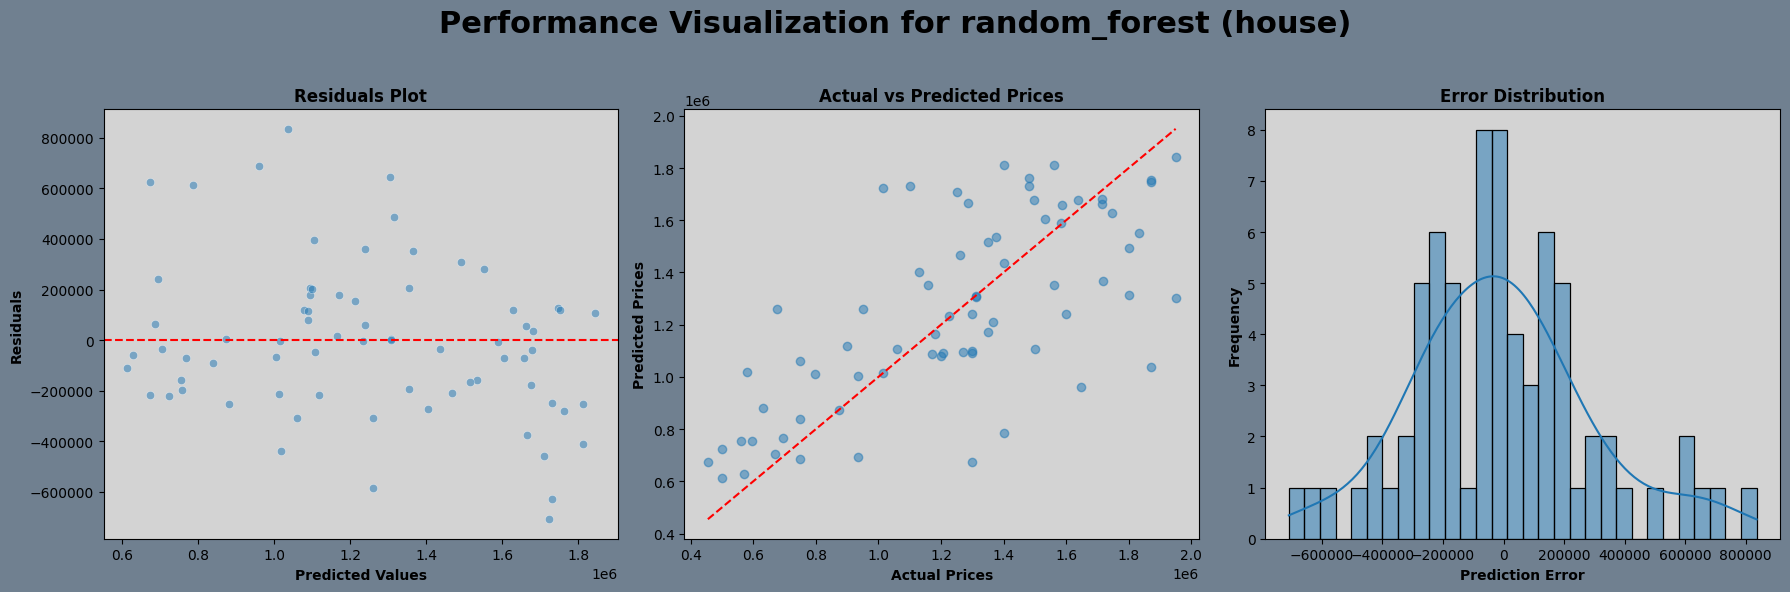

In [11]:
# House Random Forest
train_predictive_model('random_forest', 'house', df)

### **House: Random Forest Results**
##### The random forest model for predicting house prices yielded the following results:
- **Mean Squared Error (MSE):** 90,452,266,586.44
- **R² Score: 0.45**
##### For houses, the random forest model shows a moderate fit with an R² score of 0.45, indicating that it explains less than half of the variance in the data. The high MSE suggests significant prediction errors, reflecting the model's challenges in accurately predicting house prices.
### **Graphic Results**
##### - **Residuals Plot (House - Random Forest):** Residuals are scattered around zero, indicating pattern capture, but noticeable spread, especially at higher values, suggests accuracy variability. This implies some complexities may be missed, particularly for higher-priced houses.
##### - **Actual vs Predicted Prices (House - Random Forest):** Predicted prices generally align with the diagonal, indicating a positive correlation. However, noticeable dispersion, especially for higher-priced houses, suggests difficulty in accuracy for expensive properties, leading to prediction errors.
##### - **Error Distribution (House - Random Forest):** Errors are roughly normal and centered around zero, indicating minimal bias. However, the spread indicates notable variability, with significant errors, especially among outliers, despite generally accurate predictions.

[Back to Top](#Content)

Model: random_forest, Property Type: apartment
Mean Squared Error: 38158065566.2211
R^2 Score: 0.6717039951709732


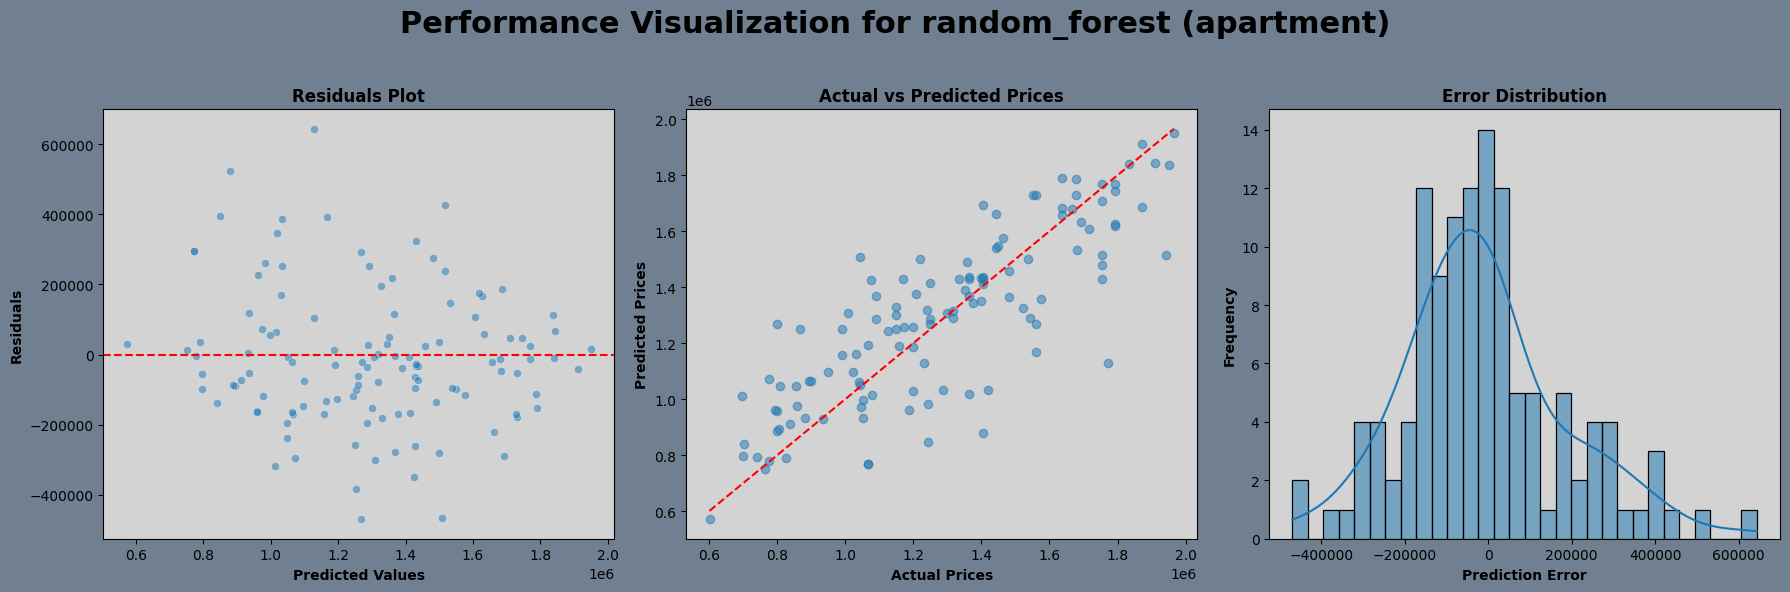

In [12]:
# Apartment Random Forest
train_predictive_model('random_forest', 'apartment', df)

### **Apartment: Random Forest Results**
##### The random forest model for predicting apartment prices yielded the following results:
- **Mean Squared Error (MSE):** 38,158,065,566.22
- **R² Score: 0.67**
##### For apartments, the random forest model performs relatively well, with an R² score of 0.67, suggesting it explains a good portion of the variance in the data. The lower MSE compared to the house data indicates that the model is more accurate in predicting apartment prices, though there is still room for improvement.
### **Graphic Results**
##### - **Residuals Plot (Apartment - Random Forest):** Residuals are scattered around zero, indicating effective capture of non-linear relationships. Despite flexibility and accuracy, variability exists in prediction accuracy at certain price ranges, highlighting limitations in perfect outcomes.
##### - **Actual vs Predicted Prices (Apartment - Random Forest):** Points closely follow the diagonal, indicating generally accurate predictions. Some scatter at lower and higher price levels suggests imperfections across all price levels, though overall alignment shows good capture of the price relationship.
##### **Error Distribution (Apartment - Random Forest):** Errors are approximately normal and centered around zero, indicating unbiased predictions. Most errors are close to zero, with fewer large errors, suggesting reliability. Slight skewness and outliers highlight some variability, but overall performance is strong in predicting apartment prices.

[Back to Top](#Content)

## **Gradient Boosting**

Model: gradient_boosting, Property Type: house
Mean Squared Error: 93456949498.50214
R^2 Score: 0.4357995423447606


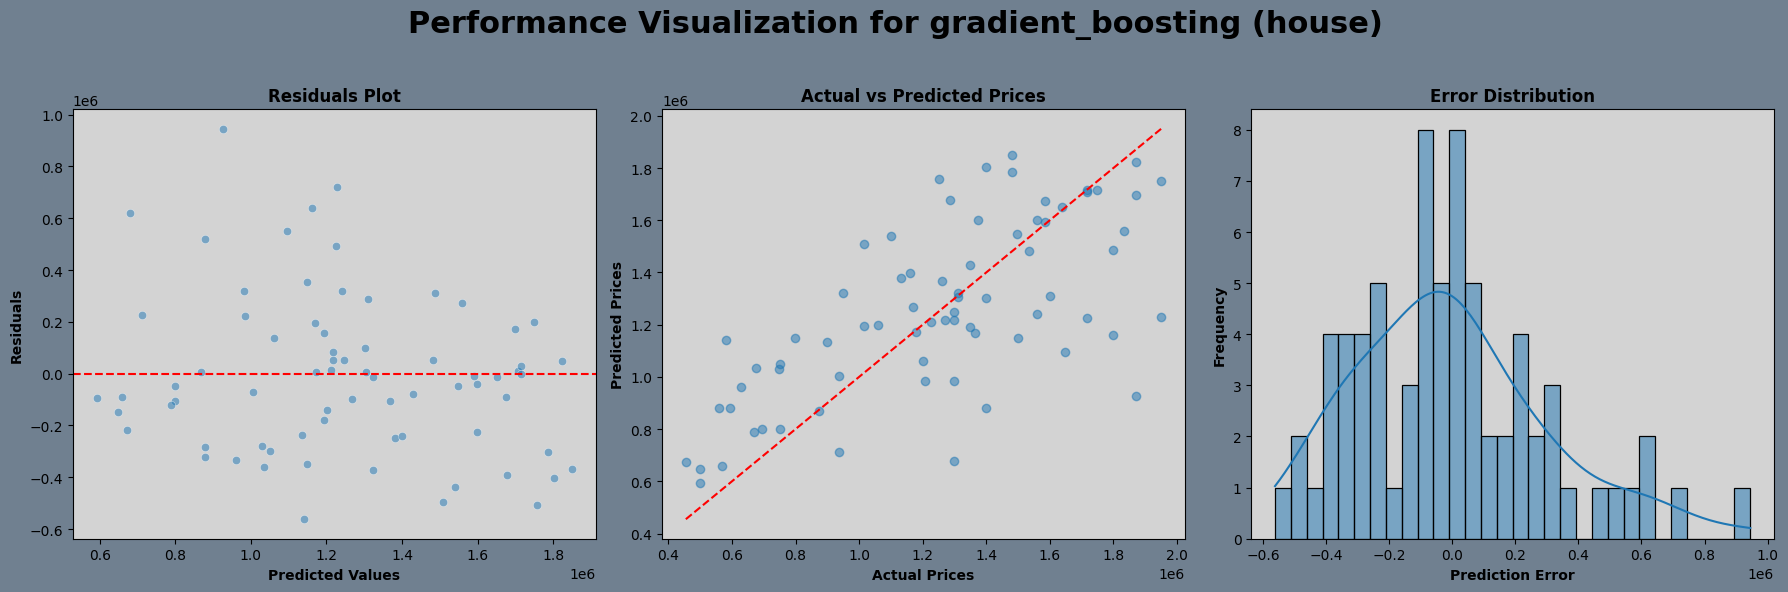

In [13]:
# House Gradient Boosting
train_predictive_model('gradient_boosting', 'house', df)

### **House: Gradient Boosting Results**
##### The gradient boosting model for predicting house prices yielded the following results:
- **Mean Squared Error (MSE):** 93,456,949,498.50
- **R² Score:** 0.44
##### For houses, the gradient boosting model shows a moderate performance with an R² score of 0.44. This indicates that while the model captures some of the variance in the data, there is still significant room for improvement. The MSE suggests that there is considerable error in the predictions, which might be due to the complexity of house pricing in the dataset.
### **Graphic Results**
##### - **Residuals Plot (House - Gradient Boosting):** Residuals are randomly scattered around zero, indicating effective pattern capture without bias. However, spread at higher values suggests variability, showing challenges in accurately predicting certain houses, particularly at price extremes.
##### - **Actual vs Predicted Prices (House - Gradient Boosting):** Points generally align with the diagonal, showing strong correlation. However, scatter at lower and higher prices suggests challenges in accuracy at extremes, indicating the model's limitation in capturing complexity in pricing.
##### - **Error Distribution (House - Gradient Boosting):** Errors are slightly skewed but concentrated around zero, indicating predictions are generally close to actual values. Variance includes both under- and overestimations, with long tails suggesting challenges with outliers, leading to significant errors in some cases.

[Back to Top](#Content)

Model: gradient_boosting, Property Type: apartment
Mean Squared Error: 36422015990.71204
R^2 Score: 0.6866402381740588


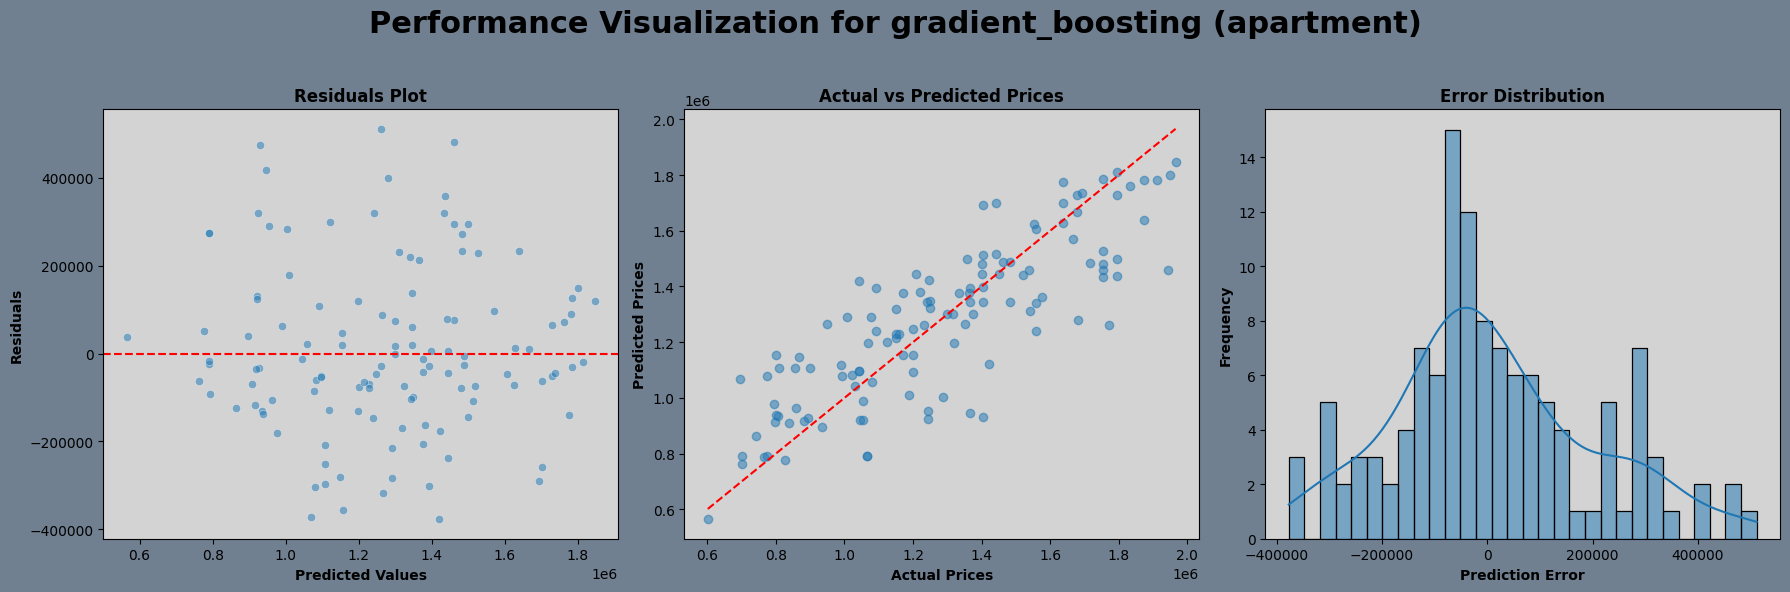

In [14]:
# Apartment Gradient Boosting
train_predictive_model('gradient_boosting', 'apartment', df)

### **Apartment: Gradient Boosting Results**
The gradient boosting model for predicting apartment prices yielded the following results:
- **Mean Squared Error (MSE):** 36,422,015,990.71
- **R² Score:** 0.69
##### For apartments, the gradient boosting model performs well with an R² score of 0.69, indicating it explains a substantial portion of the variance in the data. The relatively lower MSE suggests that the model is quite accurate in predicting apartment prices, though there remains some potential for further refinement.

### **Graphic Results**
##### - **Residuals Plot (Apartment - Gradient Boosting):** Residuals are dispersed around zero without clear patterns, indicating effective capture of relationships. However, variance, particularly around mid-values, suggests difficulties in accurately predicting across the full price range.
##### - **Actual vs Predicted Prices (Apartment - Gradient Boosting):** Points closely follow the diagonal line, indicating strong prediction accuracy. However, some spread at lower and higher prices suggests occasional struggles at these extremes. Overall, the model effectively captures key data patterns.
##### - **Error Distribution (Apartment - Gradient Boosting):** Errors are approximately normal and centered around zero, indicating unbiased predictions. Slight skew with more negative errors suggests minor overestimations. The mix of small and large errors shows performance variability, but consistency for most data points.

[Back to Top](#Content)

## **Model Performance Summary**
Below is a summary of the performance of various predictive models applied to both houses and apartments. The performance is evaluated using the R² Score and Mean Squared Error (MSE).

In [15]:
# Results Data.
data = {
    "Model": ["Linear Regression", "Linear Regression", "Lasso Regression", "Lasso Regression",
              "Decision Tree", "Decision Tree", "Random Forest", "Random Forest",
              "Gradient Boosting", "Gradient Boosting"],
    "Property Type": ["House", "Apartment", "House", "Apartment",
                      "House", "Apartment", "House", "Apartment",
                      "House", "Apartment"],
    "R² Score": [0.31, 0.68, 0.31, 0.68, 
                 0.31, 0.53, 0.45, 0.67, 
                 0.44, 0.69],
    "Mean Squared Error (MSE)": [114490611392.54, 37609714436.33, 114502773890.86, 37611495907.21,
                                  113909336988.04, 54712149941.41, 90452266586.44, 38158065566.22,
                                  93456949498.50, 36422015990.71]
}
# Create DataFrame.
df = pd.DataFrame(data)

# Show DataFrame.
df

,Model,Property Type,R² Score,Mean Squared Error (MSE)
0,Linear Regression,House,0.31,1.144906e+11
1,Linear Regression,Apartment,0.68,3.760971e+10
2,Lasso Regression,House,0.31,1.145028e+11
3,Lasso Regression,Apartment,0.68,3.761150e+10
4,Decision Tree,House,0.31,1.139093e+11
5,Decision Tree,Apartment,0.53,5.471215e+10
6,Random Forest,House,0.45,9.045227e+10
7,Random Forest,Apartment,0.67,3.815807e+10
8,Gradient Boosting,House,0.44,9.345695e+10
9,Gradient Boosting,Apartment,0.69,3.642202e+10


[Back to Top](#Content)

## **Conclusions**

1. **Data Distribution:** The dataset is predominantly composed of apartment listings, reflecting higher availability or demand within the examined price range.

2. **Feature Importance:** Size-related features, such as square meters and room counts, are significant in predicting apartment prices, while house prices appear to be influenced by a broader set of factors.

3. **Model Performance:** Ensemble models like Random Forest and Gradient Boosting showed the best performance, particularly for apartments, offering strong predictive capabilities by capturing complex nonlinear relationships.

4. **Dataset Limitations:** The smaller sample size for houses may have limited the predictive power of the models. Larger datasets would potentially enhance the model's performance.

[Back to Top](#Content)

## **Recommendations**
   - Consider gathering additional data to enrich the dataset.
   - Explore further feature engineering to enhance predictive accuracy.

[Back to Top](#Content)

## **Future Directions**
   - Continue refining models and exploring advanced techniques, such as hyperparameter tuning and ensemble stacking, to improve accuracy.
   - Use machine learning and employ automation for tasks.

These conclusions provide valuable insights into the dynamics of the Guatemalan real estate market and offer paths for future improvement in predictive modeling.

[Back to Top](#Content)
